In [3]:

from tools import plot_current_state_of_graph
import pickle
from IPython.display import HTML
import matplotlib as mpl
import numpy as np
import networkx as nx
import pandas as pd

In [4]:
cmap = mpl.colormaps['Set1']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, 6))

# Here we introduce some displaying tools to check data, graphs and their properties.

In [5]:
path  = "/home/datasets4/stein/rivers/processed_recreation/"

In [9]:
# Load necessary data
G = pickle.load(open(path + 'station_G.p', 'rb'))
ba_G = pickle.load(open(path + 'BA_G.p', 'rb'))


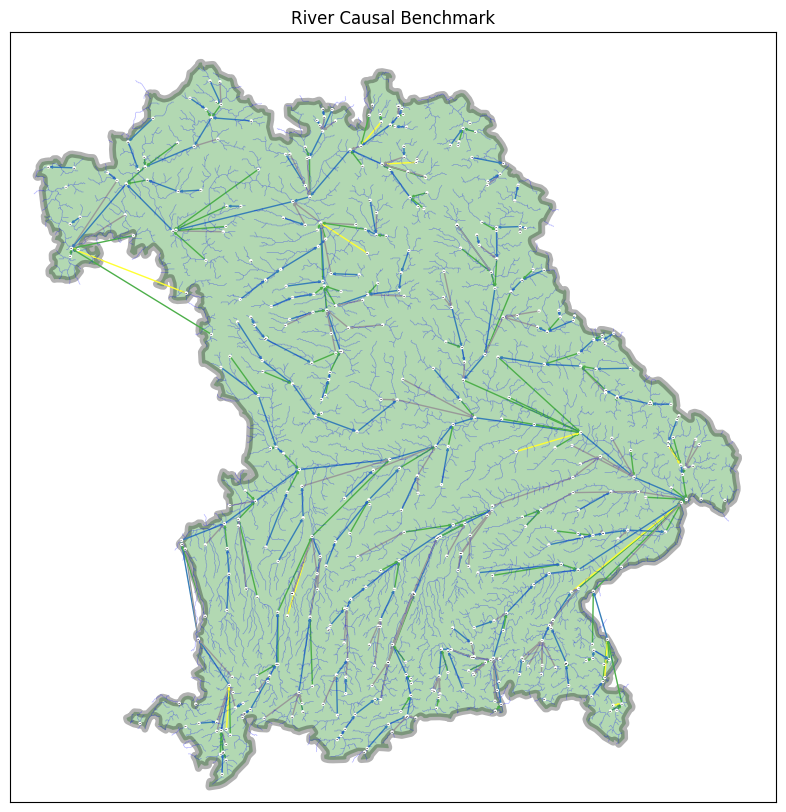

In [ ]:
plot_current_state_of_graph(
    ba_G,
    dpi=500,
    autozoom=False,
    lim=(47.2, 50.7),
    limx=(8.8, 14.1),
    node_size=2,
    save=0,
    river_map=1,
    ger_map=1,
    width=1,
    arrowsize=3,
    fs=(10, 10),
    show_edge_origin=True,
    font_size=1,
    ger_path = "product/bavaria_map.shp",
    river_path = "product/river_bavaria_map.shp",
    emphasize=[],
)

In [13]:
potential_issue = [y for y in [x for x in ba_G.edges.data()] if y[2]["h_distance"] < 0]
print([z for z in [y for y in [x[2]["km"] for x in ba_G.edges.data()] if y] if z < 0 ])
print(list(nx.nodes_with_selfloops(ba_G))),nx.find_cycle(ba_G)

[]
[]


NetworkXNoCycle: No cycle found.

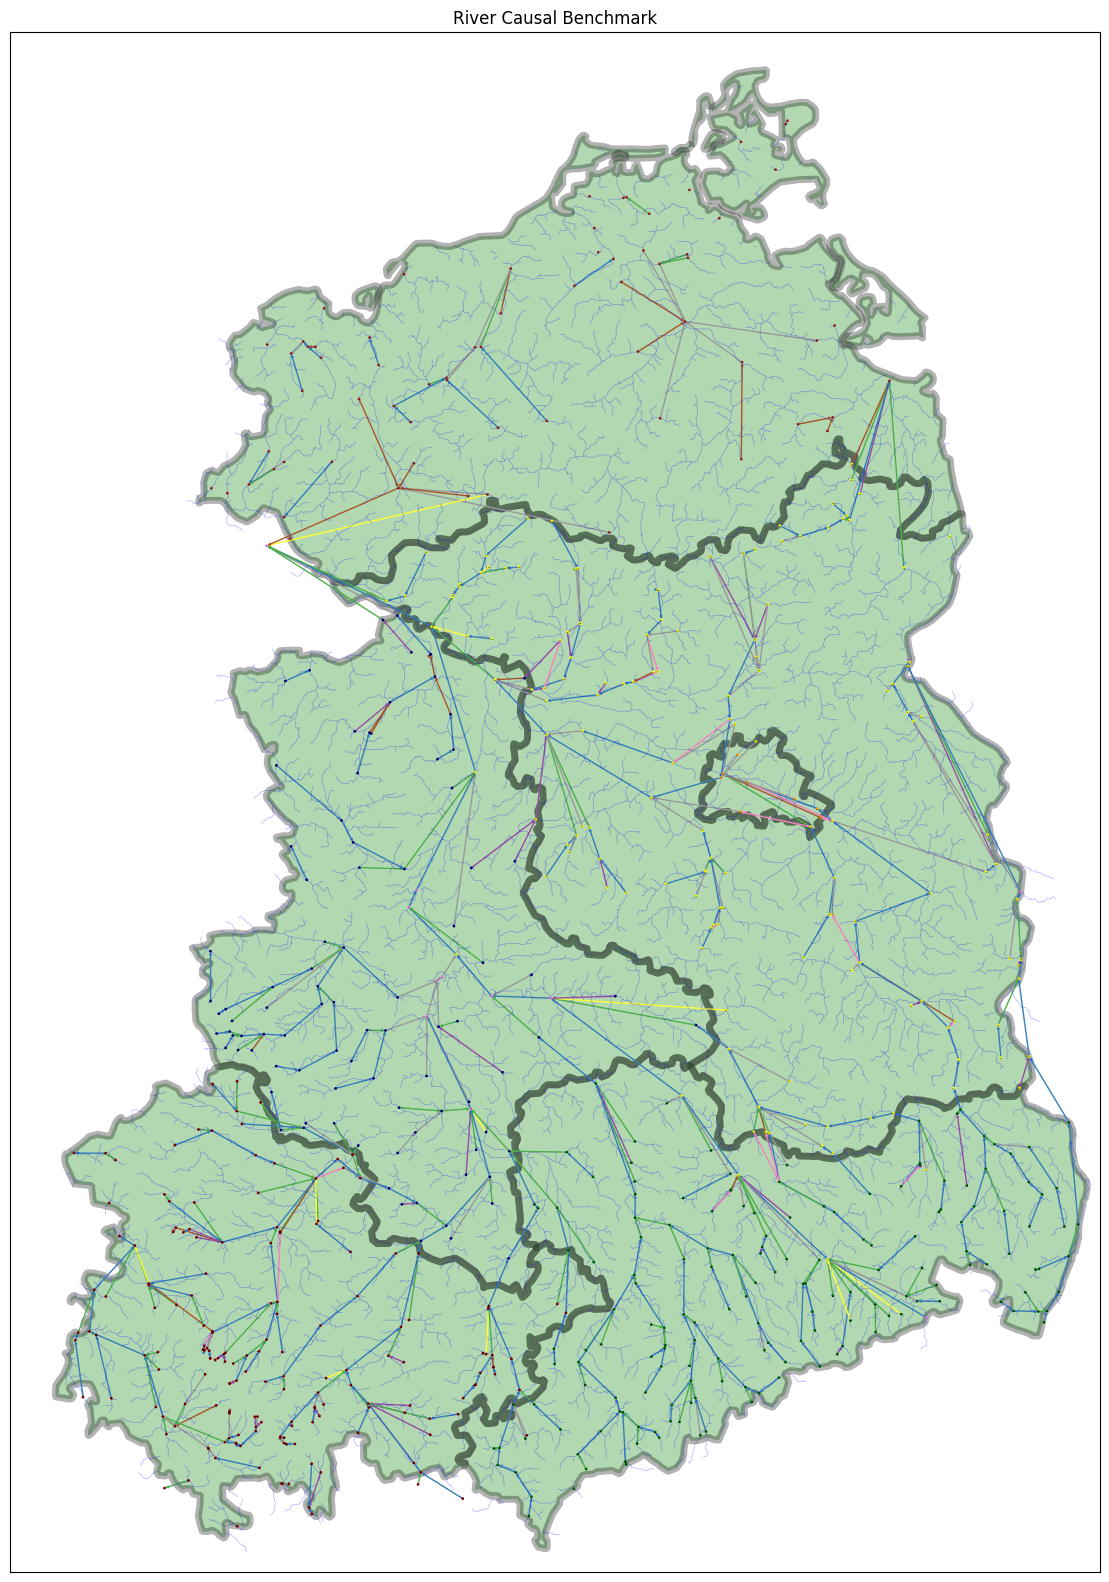

In [16]:
plot_current_state_of_graph(
    G,
    dpi=500,
    autozoom=False,
    lim=(50.1, 54.8),
    limx=(9.65, 15.1),
    node_size=1,
    save=0,
    river_map=1,
    ger_map=1,
    width=1,
    arrowsize=3,
    fs=(20, 20),
    show_edge_origin=True,
    font_size=1,
    ger_path = "product/east_german_map.shp",
    river_path = "product/river_east_german_map.shp",
    emphasize=[],
)

In [17]:
potential_issue = [y for y in [x for x in G.edges.data()] if y[2]["h_distance"] < 0]
print([z for z in [y for y in [x[2]["km"] for x in G.edges.data()] if y] if z < 0 ])
print(list(nx.nodes_with_selfloops(G))),nx.find_cycle(G)

[]
[]


NetworkXNoCycle: No cycle found.

In [18]:
# FINAL product: 

"BA graph"
"East Germany Graph"
"TS set east germany"
"TS set bavaria"

'TS set bavaria'

# FINAL EXPORT

In [19]:
meta_data = pd.read_csv(path + "meta_joined_final.csv", index_col=0)

In [20]:
# Save new data file: 
data = pd.read_csv(path + "ts_ds_final.csv", index_col=0)
data.columns = data.columns.astype(int)

In [21]:
meta_data

,R,X,Y,D,H,QD,QH,QX,QY,QR,O,original_id
ID,,,,,,,,,,,,
0,Aalbach,49.774734,9.653490,NaN,186.11,-1,0,0,0,0,BA,id_24585006
1,Abens,48.816528,11.830689,NaN,358.03,-1,0,0,0,0,BA,id_13322005
2,Abens,48.642726,11.784162,NaN,415.62,-1,0,0,0,0,BA,id_13321002
3,Ach,47.767749,11.123223,NaN,585.06,-1,0,0,0,0,BA,id_16618008
4,Ach,47.692762,11.122015,NaN,652.42,-1,0,0,0,0,BA,id_16616002
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,Ödbach,48.820613,12.686933,NaN,326.95,-1,0,0,0,0,BA,id_15935504
1157,Ölschnitz,49.897330,11.661818,NaN,370.08,-1,0,0,0,0,BA,id_24126009
1158,Ölschnitz,50.043579,11.670196,NaN,375.28,-1,0,0,0,0,BA,id_24113459


In [22]:
# Meta and data match
np.all(data.columns== meta_data.index)

np.True_

In [23]:
# Grpahs are exclusive
[x for x in G.nodes if x in ba_G.nodes],[x for x in ba_G.nodes if x in G.nodes] 

([], [])

In [24]:
data.drop(columns=139, inplace=True)

In [ ]:
meta_data.drop(index=139, inplace=True)

In [27]:
np.all(meta_data.index == sorted(list(G.nodes) + list(ba_G.nodes))),np.all(data.columns == sorted(list(G.nodes) + list(ba_G.nodes)))

(np.True_, np.True_)

In [28]:
train = data[list(ba_G.nodes)]
test = data[list(G.nodes)]

In [29]:
train_meta = meta_data.loc[list(ba_G.nodes)]
test_meta = meta_data.loc[list(G.nodes)]

In [30]:
pickle.dump(G,open('product/rivers_east_germany.p', 'wb'))
pickle.dump(ba_G,open('product/rivers_bavaria.p', 'wb'))

In [31]:
train_meta.to_csv("product/rivers_meta_bavaria.csv")
test_meta.to_csv("product/rivers_meta_east_germany.csv")

In [32]:
train.index.name = "datetime"
test.index.name = "datetime"

In [33]:
train.to_csv("product/rivers_ts_bavaria.csv" )
test.to_csv("product//rivers_ts_east_germany.csv")
